In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5



# First attempt at convnet

## Pre-process images

In [2]:
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_normal_dir = r'.\data\OCT2017\train\NORMAL'
original_cnv_dir = r'.\data\OCT2017\train\CNV'
original_dme_dir = r'.\data\OCT2017\train\DME'
original_drus_dir = r'.\data\OCT2017\train\DRUSEN'

# The directory where we will
# store our smaller dataset
base_dir = r'.\data\OCT2017\OCT2017'
# os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'val')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Directory with our training NORMAL pictures
train_norm_dir = os.path.join(train_dir, 'NORMAL')
# os.mkdir(train_norm_dir)

# Directory with our training CNV pictures
train_cnv_dir = os.path.join(train_dir, 'CNV')
# os.mkdir(train_cnv_dir)

# Directory with our training DME pictures
train_dme_dir = os.path.join(train_dir, 'DME')
# os.mkdir(train_dme_dir)

# Directory with our training DRUSEN pictures
train_drus_dir = os.path.join(train_dir, 'DRUSEN')
# os.mkdir(train_drus_dir)

# Directory with our validation NORMAL pictures
validation_norm_dir = os.path.join(validation_dir, 'NORMAL')
# os.mkdir(validation_norm_dir)

# Directory with our validation CNV pictures
validation_cnv_dir = os.path.join(validation_dir, 'CNV')
# os.mkdir(validation_cnv_dir)

# Directory with our validation DME pictures
validation_dme_dir = os.path.join(validation_dir, 'DME')
# os.mkdir(validation_dme_dir)

# Directory with our validation DRUSEN pictures
validation_drus_dir = os.path.join(validation_dir, 'DRUSEN')
# os.mkdir(validation_drus_dir)

# Directory with our test NORMAL pictures
test_norm_dir = os.path.join(test_dir, 'NORMAL')
# os.mkdir(test_norm_dir)

# Directory with our test CNV pictures
test_cnv_dir = os.path.join(test_dir, 'CNV')
# os.mkdir(test_cnv_dir)

# Directory with our test DME pictures
test_dme_dir = os.path.join(test_dir, 'DME')
# os.mkdir(test_dme_dir)

# Directory with our test DRUSEN pictures
test_drus_dir = os.path.join(test_dir, 'DRUSEN')
# os.mkdir(test_drus_dir)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

** **

## Batch = 32

In [5]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 83484 images belonging to 4 classes.


In [6]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 32 images belonging to 4 classes.


In [7]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 4)


## Building the network

`relu`, `sigmoid`

In [8]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [9]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [10]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [11]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 30s 235ms/step - loss: 1.2183 - acc: 0.4607 - val_loss: 1.4416 - val_acc: 0.4688
Epoch 2/50
128/128 [==============================] - 27s 213ms/step - loss: 1.1301 - acc: 0.5586 - val_loss: 1.2831 - val_acc: 0.5000
Epoch 3/50
128/128 [==============================] - 28s 218ms/step - loss: 1.0022 - acc: 0.6155 - val_loss: 1.1343 - val_acc: 0.5000
Epoch 4/50
128/128 [==============================] - 28s 215ms/step - loss: 0.8817 - acc: 0.6653 - val_loss: 0.9420 - val_acc: 0.5000
Epoch 5/50
128/128 [==============================] - 28s 217ms/step - loss: 0.8411 - acc: 0.6863 - val_loss: 0.9106 - val_acc: 0.5938
Epoch 6/50
128/128 [==============================] - 28s 215ms/step - loss: 0.7627 - acc: 0.7129 - val_loss: 1.0375 - val_acc: 0.5625
Epoch 7/50
128/128 [==============================] - 28s 220ms/step - loss: 0.7368 - acc: 0.7253 - val_loss: 0.8079 - val_acc: 0.5938
Epoch 8/50
128/128 [==============================] - 2

In [12]:
model1.save('./models/random_samples/32_relu_sig.h5')

In [13]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.8873966932296753


`tanh` vs `sigmoid`

In [14]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Compilation

In [16]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [17]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 14s 110ms/step - loss: 1.1196 - acc: 0.5483 - val_loss: 1.5957 - val_acc: 0.4688
Epoch 2/50
128/128 [==============================] - 13s 103ms/step - loss: 0.9111 - acc: 0.6545 - val_loss: 0.9802 - val_acc: 0.5312
Epoch 3/50
128/128 [==============================] - 13s 103ms/step - loss: 0.8420 - acc: 0.6807 - val_loss: 0.9190 - val_acc: 0.5312
Epoch 4/50
128/128 [==============================] - 13s 104ms/step - loss: 0.7663 - acc: 0.7117 - val_loss: 0.8328 - val_acc: 0.6250
Epoch 5/50
128/128 [==============================] - 13s 103ms/step - loss: 0.7139 - acc: 0.7288 - val_loss: 0.6828 - val_acc: 0.7500
Epoch 6/50
128/128 [==============================] - 13s 103ms/step - loss: 0.6750 - acc: 0.7405 - val_loss: 0.7177 - val_acc: 0.7188
Epoch 7/50
128/128 [==============================] - 13s 103ms/step - loss: 0.6600 - acc: 0.7527 - val_loss: 0.5845 - val_acc: 0.8125
Epoch 8/50
128/128 [==============================] - 1

In [18]:
model2.save('./models/random_samples/32_tanh_sig.h5')

In [19]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9266529083251953


`tanh` vs `softmax`

In [20]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [21]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [22]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [23]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 14s 107ms/step - loss: 1.0997 - acc: 0.5671 - val_loss: 1.1102 - val_acc: 0.5312
Epoch 2/50
128/128 [==============================] - 13s 101ms/step - loss: 0.8821 - acc: 0.6704 - val_loss: 1.0887 - val_acc: 0.5000
Epoch 3/50
128/128 [==============================] - 13s 102ms/step - loss: 0.8057 - acc: 0.7004 - val_loss: 0.8791 - val_acc: 0.5625
Epoch 4/50
128/128 [==============================] - 13s 101ms/step - loss: 0.7379 - acc: 0.7280 - val_loss: 0.9255 - val_acc: 0.5938
Epoch 5/50
128/128 [==============================] - 13s 103ms/step - loss: 0.7048 - acc: 0.7383 - val_loss: 0.9095 - val_acc: 0.5938
Epoch 6/50
128/128 [==============================] - 13s 103ms/step - loss: 0.6411 - acc: 0.7517 - val_loss: 0.8608 - val_acc: 0.6875
Epoch 7/50
128/128 [==============================] - 13s 102ms/step - loss: 0.6122 - acc: 0.7744 - val_loss: 0.6884 - val_acc: 0.6875
Epoch 8/50
128/128 [==============================] - 1

In [24]:
model3.save('./models/random_samples/32_tanh_sfm.h5')

In [25]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9431818127632141


`relu` vs `softmax`

In [26]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [27]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [28]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [29]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 14s 108ms/step - loss: 1.1737 - acc: 0.5183 - val_loss: 1.3046 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 13s 103ms/step - loss: 0.9712 - acc: 0.6377 - val_loss: 0.9939 - val_acc: 0.5312
Epoch 3/50
128/128 [==============================] - 13s 103ms/step - loss: 0.8749 - acc: 0.6606 - val_loss: 0.9108 - val_acc: 0.5625
Epoch 4/50
128/128 [==============================] - 13s 102ms/step - loss: 0.7944 - acc: 0.7056 - val_loss: 0.9061 - val_acc: 0.5938
Epoch 5/50
128/128 [==============================] - 13s 102ms/step - loss: 0.7175 - acc: 0.7327 - val_loss: 0.7303 - val_acc: 0.6250
Epoch 6/50
128/128 [==============================] - 13s 103ms/step - loss: 0.6510 - acc: 0.7534 - val_loss: 0.9405 - val_acc: 0.5938
Epoch 7/50
128/128 [==============================] - 13s 102ms/step - loss: 0.6408 - acc: 0.7603 - val_loss: 0.6867 - val_acc: 0.6562
Epoch 8/50
128/128 [==============================] - 1

In [30]:
model4.save('./models/random_samples/32_relu_sfm.h5')

In [31]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9535123705863953


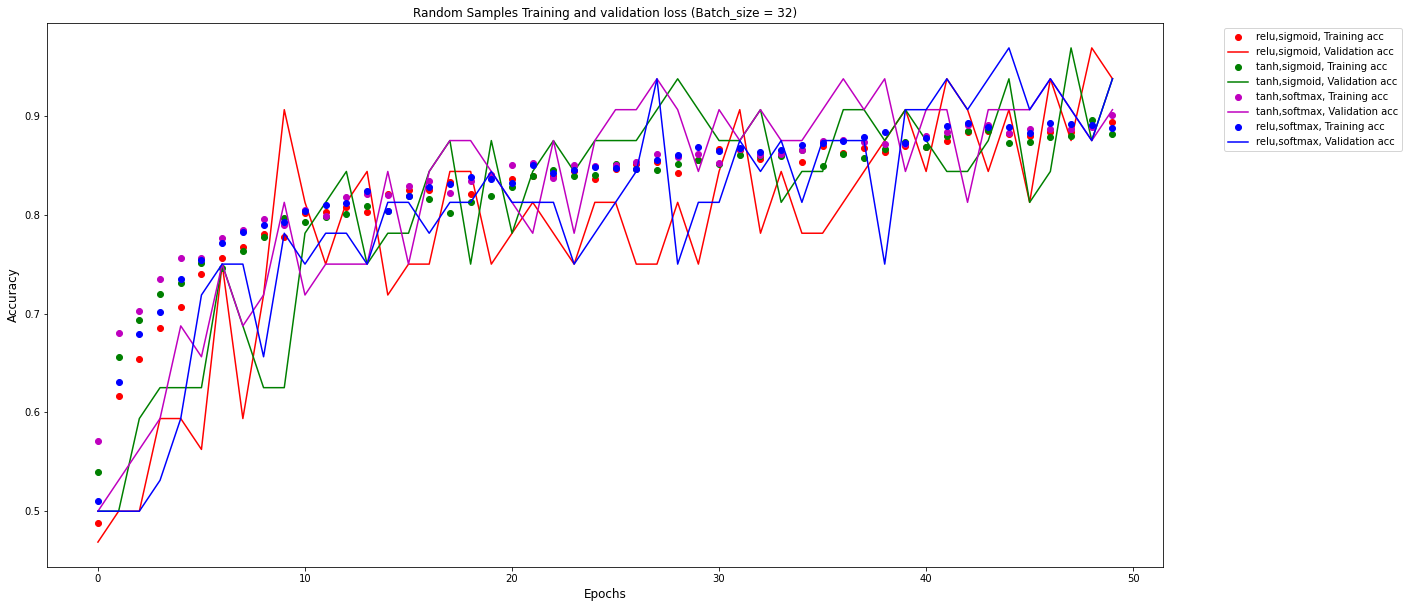

In [35]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Random Samples Training and validation loss (Batch_size = 32)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.show()

** **

## Batch = 64

In [32]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 83484 images belonging to 4 classes.


In [33]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 32 images belonging to 4 classes.


In [34]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 4)


## Building the network

`relu`, `sigmoid`

In [35]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [36]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [37]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [38]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 170ms/step - loss: 1.1597 - acc: 0.5282 - val_loss: 1.1580 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 20s 159ms/step - loss: 0.9821 - acc: 0.6251 - val_loss: 1.1146 - val_acc: 0.5000
Epoch 3/50
128/128 [==============================] - 20s 159ms/step - loss: 0.8475 - acc: 0.6829 - val_loss: 0.9339 - val_acc: 0.5312
Epoch 4/50
128/128 [==============================] - 20s 159ms/step - loss: 0.7713 - acc: 0.7115 - val_loss: 0.9901 - val_acc: 0.5000
Epoch 5/50
128/128 [==============================] - 20s 159ms/step - loss: 0.6974 - acc: 0.7384 - val_loss: 0.7370 - val_acc: 0.6250
Epoch 6/50
128/128 [==============================] - 20s 159ms/step - loss: 0.6473 - acc: 0.7628 - val_loss: 0.7657 - val_acc: 0.6562
Epoch 7/50
128/128 [==============================] - 21s 166ms/step - loss: 0.6116 - acc: 0.7740 - val_loss: 0.5654 - val_acc: 0.7812
Epoch 8/50
128/128 [==============================] - 2

In [39]:
model1.save('./models/random_samples/64_relu_sig.h5')

In [40]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.94111567735672


`tanh` vs `sigmoid`

In [41]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [42]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [43]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [44]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 170ms/step - loss: 1.1059 - acc: 0.5565 - val_loss: 1.0181 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 21s 160ms/step - loss: 0.8608 - acc: 0.6755 - val_loss: 1.0551 - val_acc: 0.5312
Epoch 3/50
128/128 [==============================] - 20s 159ms/step - loss: 0.7822 - acc: 0.7051 - val_loss: 0.9012 - val_acc: 0.5625
Epoch 4/50
128/128 [==============================] - 20s 159ms/step - loss: 0.7222 - acc: 0.7255 - val_loss: 0.9192 - val_acc: 0.6250
Epoch 5/50
128/128 [==============================] - 21s 160ms/step - loss: 0.6697 - acc: 0.7502 - val_loss: 0.6869 - val_acc: 0.7188
Epoch 6/50
128/128 [==============================] - 20s 159ms/step - loss: 0.6333 - acc: 0.7637 - val_loss: 0.7147 - val_acc: 0.6562
Epoch 7/50
128/128 [==============================] - 20s 159ms/step - loss: 0.6023 - acc: 0.7789 - val_loss: 0.6677 - val_acc: 0.7188
Epoch 8/50
128/128 [==============================] - 2

In [45]:
model2.save('./models/random_samples/64_tanh_sig.h5')

In [46]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.942148745059967


`tanh` vs `softmax`

In [47]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [48]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [49]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [50]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 170ms/step - loss: 1.0852 - acc: 0.5684 - val_loss: 1.3305 - val_acc: 0.5312
Epoch 2/50
128/128 [==============================] - 20s 159ms/step - loss: 0.8434 - acc: 0.6826 - val_loss: 0.8818 - val_acc: 0.5938
Epoch 3/50
128/128 [==============================] - 20s 158ms/step - loss: 0.7696 - acc: 0.7058 - val_loss: 0.8358 - val_acc: 0.5938
Epoch 4/50
128/128 [==============================] - 20s 159ms/step - loss: 0.6906 - acc: 0.7396 - val_loss: 0.6967 - val_acc: 0.6875
Epoch 5/50
128/128 [==============================] - 20s 159ms/step - loss: 0.6448 - acc: 0.7614 - val_loss: 0.8318 - val_acc: 0.5938
Epoch 6/50
128/128 [==============================] - 20s 158ms/step - loss: 0.6054 - acc: 0.7761 - val_loss: 0.7508 - val_acc: 0.6562
Epoch 7/50
128/128 [==============================] - 20s 158ms/step - loss: 0.5872 - acc: 0.7884 - val_loss: 0.6364 - val_acc: 0.6875
Epoch 8/50
128/128 [==============================] - 2

In [51]:
model3.save('./models/random_samples/64_tanh_sfm.h5')

In [52]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9710744023323059


`relu` vs `softmax`

In [53]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [54]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [55]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [56]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 22s 169ms/step - loss: 1.1428 - acc: 0.5359 - val_loss: 1.3899 - val_acc: 0.4062
Epoch 2/50
128/128 [==============================] - 21s 160ms/step - loss: 0.9331 - acc: 0.6472 - val_loss: 1.0297 - val_acc: 0.5312
Epoch 3/50
128/128 [==============================] - 20s 158ms/step - loss: 0.8315 - acc: 0.6852 - val_loss: 0.8647 - val_acc: 0.5625
Epoch 4/50
128/128 [==============================] - 21s 161ms/step - loss: 0.7363 - acc: 0.7208 - val_loss: 0.6800 - val_acc: 0.6250
Epoch 5/50
128/128 [==============================] - 20s 160ms/step - loss: 0.6374 - acc: 0.7665 - val_loss: 0.6480 - val_acc: 0.6875
Epoch 6/50
128/128 [==============================] - 20s 160ms/step - loss: 0.6222 - acc: 0.7716 - val_loss: 0.6386 - val_acc: 0.7188
Epoch 7/50
128/128 [==============================] - 20s 160ms/step - loss: 0.5817 - acc: 0.7876 - val_loss: 0.5922 - val_acc: 0.7500
Epoch 8/50
128/128 [==============================] - 2

In [57]:
model4.save('./models/random_samples/64_relu_sfm.h5')

In [58]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9493801593780518


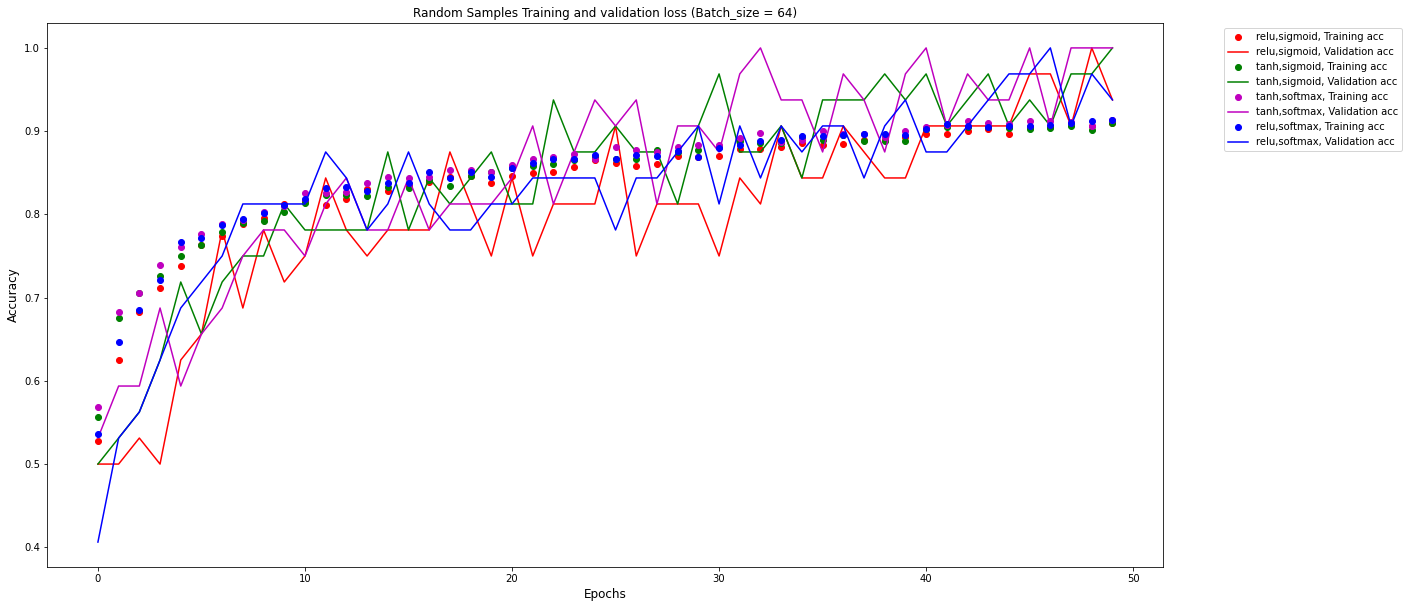

In [59]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Random Samples Training and validation loss (Batch_size = 64)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.show()

** **

## Batch = 128

In [60]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 83484 images belonging to 4 classes.


In [61]:
val_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=128, class_mode='categorical')

Found 32 images belonging to 4 classes.


In [62]:
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 150, 150, 3)
labels batch shape: (128, 4)


## Building the network

`relu`, `sigmoid`

In [63]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

In [64]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 128)      

## Compilation

In [65]:
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [66]:
%%time
history = model1.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 37s 293ms/step - loss: 1.1104 - acc: 0.5564 - val_loss: 1.1580 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 35s 274ms/step - loss: 0.9040 - acc: 0.6599 - val_loss: 0.8392 - val_acc: 0.5625
Epoch 3/50
128/128 [==============================] - 35s 273ms/step - loss: 0.7768 - acc: 0.7076 - val_loss: 0.7710 - val_acc: 0.5938
Epoch 4/50
128/128 [==============================] - 35s 271ms/step - loss: 0.6940 - acc: 0.7432 - val_loss: 0.5986 - val_acc: 0.7500
Epoch 5/50
128/128 [==============================] - 35s 271ms/step - loss: 0.6251 - acc: 0.7680 - val_loss: 0.7339 - val_acc: 0.6562
Epoch 6/50
128/128 [==============================] - 36s 278ms/step - loss: 0.5854 - acc: 0.7882 - val_loss: 0.5600 - val_acc: 0.7500
Epoch 7/50
128/128 [==============================] - 35s 273ms/step - loss: 0.5360 - acc: 0.8048 - val_loss: 0.8757 - val_acc: 0.6562
Epoch 8/50
128/128 [==============================] - 3

In [67]:
model1.save('./models/random_samples/128_relu_sig.h5')

In [68]:
model1_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model1.evaluate_generator(model1_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9772727489471436


`tanh` vs `sigmoid`

In [69]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='tanh'))
model2.add(layers.Dense(4, activation='sigmoid'))

In [70]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [71]:
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [72]:
%%time
history2 = model2.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 38s 294ms/step - loss: 1.0765 - acc: 0.5668 - val_loss: 1.0412 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 35s 270ms/step - loss: 0.8357 - acc: 0.6837 - val_loss: 0.7370 - val_acc: 0.6250
Epoch 3/50
128/128 [==============================] - 35s 272ms/step - loss: 0.7267 - acc: 0.7267 - val_loss: 0.8719 - val_acc: 0.5625
Epoch 4/50
128/128 [==============================] - 35s 271ms/step - loss: 0.6744 - acc: 0.7463 - val_loss: 0.5837 - val_acc: 0.7188
Epoch 5/50
128/128 [==============================] - 35s 272ms/step - loss: 0.6216 - acc: 0.7725 - val_loss: 0.6174 - val_acc: 0.7500
Epoch 6/50
128/128 [==============================] - 35s 274ms/step - loss: 0.5796 - acc: 0.7860 - val_loss: 0.6161 - val_acc: 0.6875
Epoch 7/50
128/128 [==============================] - 35s 271ms/step - loss: 0.5512 - acc: 0.7946 - val_loss: 0.5107 - val_acc: 0.8125
Epoch 8/50
128/128 [==============================] - 3

In [73]:
model2.save('./models/random_samples/128_tanh_sig.h5')

In [74]:
model2_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model2.evaluate_generator(model2_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.96074378490448


`tanh` vs `softmax`

In [75]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='tanh',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='tanh'))
model3.add(layers.Dense(4, activation='softmax'))

In [76]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [77]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [78]:
%%time
history3 = model3.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 37s 290ms/step - loss: 1.0484 - acc: 0.5889 - val_loss: 0.9693 - val_acc: 0.5312
Epoch 2/50
128/128 [==============================] - 35s 270ms/step - loss: 0.7911 - acc: 0.6998 - val_loss: 0.9327 - val_acc: 0.5625
Epoch 3/50
128/128 [==============================] - 34s 269ms/step - loss: 0.6865 - acc: 0.7408 - val_loss: 0.7524 - val_acc: 0.6562
Epoch 4/50
128/128 [==============================] - 35s 271ms/step - loss: 0.6303 - acc: 0.7681 - val_loss: 0.6587 - val_acc: 0.7188
Epoch 5/50
128/128 [==============================] - 34s 267ms/step - loss: 0.5954 - acc: 0.7818 - val_loss: 0.7065 - val_acc: 0.7188
Epoch 6/50
128/128 [==============================] - 35s 270ms/step - loss: 0.5459 - acc: 0.8035 - val_loss: 0.5864 - val_acc: 0.8125
Epoch 7/50
128/128 [==============================] - 35s 270ms/step - loss: 0.5262 - acc: 0.8111 - val_loss: 0.5375 - val_acc: 0.8438
Epoch 8/50
128/128 [==============================] - 3

In [79]:
model3.save('./models/random_samples/128_tanh_sfm.h5')

In [80]:
model3_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model3.evaluate_generator(model3_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9431818127632141


`relu` vs `softmax`

In [81]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(4, activation='softmax'))

In [82]:
model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)     

## Compilation

In [83]:
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fit the model with a batch generator

In [84]:
%%time
history4 = model4.fit_generator(train_gen, steps_per_epoch=128, epochs=50, validation_data=val_gen, validation_steps=50)

Epoch 1/50
128/128 [==============================] - 38s 294ms/step - loss: 1.1036 - acc: 0.5672 - val_loss: 1.1349 - val_acc: 0.5000
Epoch 2/50
128/128 [==============================] - 35s 277ms/step - loss: 0.8979 - acc: 0.6580 - val_loss: 0.9163 - val_acc: 0.5625
Epoch 3/50
128/128 [==============================] - 38s 298ms/step - loss: 0.7777 - acc: 0.7047 - val_loss: 0.7781 - val_acc: 0.5938
Epoch 4/50
128/128 [==============================] - 35s 277ms/step - loss: 0.6875 - acc: 0.7396 - val_loss: 0.6780 - val_acc: 0.6250
Epoch 5/50
128/128 [==============================] - 35s 275ms/step - loss: 0.6394 - acc: 0.7632 - val_loss: 0.6152 - val_acc: 0.7812
Epoch 6/50
128/128 [==============================] - 35s 276ms/step - loss: 0.5817 - acc: 0.7873 - val_loss: 0.5732 - val_acc: 0.7500
Epoch 7/50
128/128 [==============================] - 35s 275ms/step - loss: 0.5572 - acc: 0.7999 - val_loss: 0.5483 - val_acc: 0.7812
Epoch 8/50
128/128 [==============================] - 3

In [85]:
model4.save('./models/random_samples/128_relu_sfm.h5')

In [86]:
model4_test_gen=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=40,
                                                class_mode='categorical'
                                               )

test_loss, test_acc = model4.evaluate_generator(model4_test_gen, steps=50)
print('test acc:', test_acc)

Found 968 images belonging to 4 classes.
test acc: 0.9669421315193176


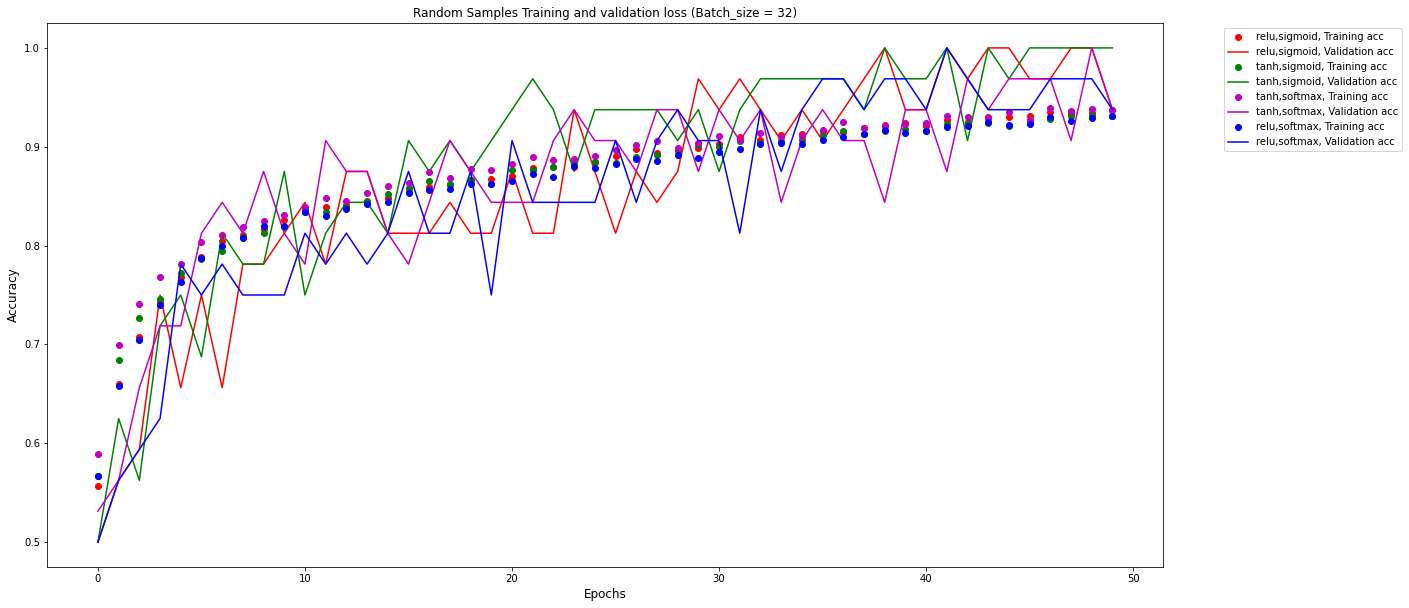

In [87]:
%matplotlib inline

plt.figure(figsize=(20,10))

acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, "ro", label="relu,sigmoid, Training acc")
plt.plot(epochs, val_acc1, "r", label="relu,sigmoid, Validation acc")

plt.plot(epochs, acc2, "go", label="tanh,sigmoid, Training acc")
plt.plot(epochs, val_acc2, "g", label="tanh,sigmoid, Validation acc")

plt.plot(epochs, acc3, "mo", label="tanh,softmax, Training acc")
plt.plot(epochs, val_acc3, "m", label="tanh,softmax, Validation acc")

plt.plot(epochs, acc4, "bo", label="relu,softmax, Training acc")
plt.plot(epochs, val_acc4, "b", label="relu,softmax, Validation acc")

plt.title('Random Samples Training and validation loss (Batch_size = 32)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.show()